In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.constants import C2K, K2C

from metpy.calc import get_wind_components, lcl, dry_lapse, parcel_profile
from metpy.plots import SkewT

In [2]:
# Parse the data
p, T, Td, direc, spd = np.loadtxt('../testdata/may3_sounding.txt',
        usecols=(0, 2, 3, 6, 7), unpack=True)
u,v = get_wind_components(spd, direc)

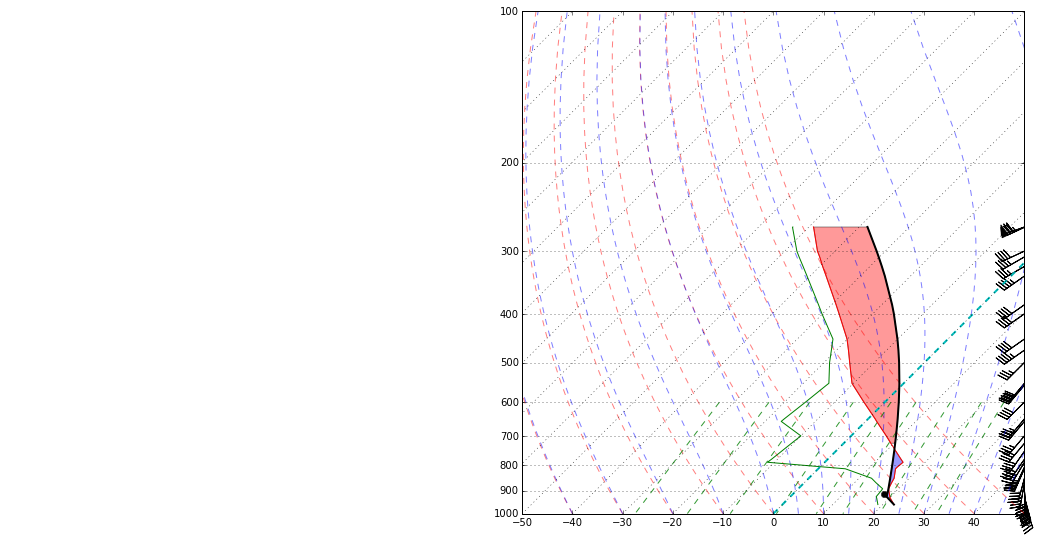

In [3]:
# Create a new figure. The dimensions here give a good aspect ratio
fig = plt.figure(figsize=(9, 9))
skew = SkewT(fig, rotation=45)

# Plot the data using normal plotting functions, in this case using
# log scaling in Y, as dictated by the typical meteorological plot
skew.plot(p, T, 'r')
skew.plot(p, Td, 'g')
skew.plot_barbs(p, u, v)
skew.ax.set_ylim(1000, 100)
skew.ax.set_xlim(-40, 60)

# Calculate LCL height and plot as black dot
l = lcl(p[0], C2K(T[0]), C2K(Td[0]))
skew.plot(l, K2C(dry_lapse(l, C2K(T[0]), p[0])), 'ko',
        markerfacecolor='black')

# Calculate full parcel profile and add to plot as black line
prof = K2C(parcel_profile(p, C2K(T[0]), C2K(Td[0])))
skew.plot(p, prof, 'k', linewidth=2)

# Example of coloring area between profiles
skew.ax.fill_betweenx(p, T, prof, where=T>=prof, facecolor='blue', alpha=0.4)
skew.ax.fill_betweenx(p, T, prof, where=T<prof, facecolor='red', alpha=0.4)

# An example of a slanted line at constant T -- in this case the 0
# isotherm
l = skew.ax.axvline(0, color='c', linestyle='--', linewidth=2)

# Add the relevant special lines
skew.plot_dry_adiabats()
skew.plot_moist_adiabats()
skew.plot_mixing_lines()

# Show the plot
plt.show()